<a href="https://colab.research.google.com/github/PhuongAnh2212/Your-Final-Croissant-Game/blob/data/Datasheet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset

In [1]:
pip install pycountry

In [2]:
import pandas as pd
import io

# Assuming the file name is 'data.csv'
file_name = 'Queer Game.csv'

In [3]:
df = pd.read_csv(file_name)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Queer Game.csv'

In [8]:
# Assuming you have already read the CSV file into a DataFrame 'df'

# Count occurrences of 'Unknown' in the 'Country' column
unknown_count = (df['Country'] == 'Unknown').sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentage of 'Unknown' compared to the total
percentage_unknown = (unknown_count / total_rows) * 100

print("Number of 'Unknown' in 'Country' column:", unknown_count)
print("Total number of rows:", total_rows)
print("Percentage of 'Unknown' compared to total: {:.2f}%".format(percentage_unknown))


Number of 'Unknown' in 'Country' column: 641
Total number of rows: 1836
Percentage of 'Unknown' compared to total: 34.91%


#Data Prepocessing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out "Unknown" values from the 'Country' column
filtered_df = df[df['Country'] != 'Unknown']

# Count occurrences of each country
country_counts = filtered_df['Country'].value_counts()


In [10]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Frequency']

# Display the table
print(country_counts)

              Country  Frequency
0             Unknown        641
1                  US        455
2               Japan        346
3                  UK         82
4              Canada         74
5           Australia         41
6              France         32
7               Italy         19
8             Finland         13
9               Spain         12
10             Sweden         12
11             German         10
12             Brazil         10
13             Poland          8
14              China          7
15             Norway          6
16            Belgium          5
17             Taiwan          5
18        South Korea          5
19            Germany          5
20             Russia          4
21            Denmark          4
22          US and UK          4
23        Netherlands          3
24   UK and Australia          3
25  US, Canada,Sweden          3
26          Venezuela          2
27          Argentina          2
28       South Africa          2
29        

### Exclude Game from >1 Developer

In [11]:
def exclude_rows_by_index(df, exclude_indices):

    return df.drop(exclude_indices)

# Indices to exclude
exclude_indices = [0, 19, 22, 24, 36, 40]

# Apply the function to exclude rows
filtered_df = exclude_rows_by_index(country_counts, exclude_indices)

# Display the filtered DataFrame
print(filtered_df)


              Country  Frequency
1                  US        455
2               Japan        346
3                  UK         82
4              Canada         74
5           Australia         41
6              France         32
7               Italy         19
8             Finland         13
9               Spain         12
10             Sweden         12
11             German         10
12             Brazil         10
13             Poland          8
14              China          7
15             Norway          6
16            Belgium          5
17             Taiwan          5
18        South Korea          5
20             Russia          4
21            Denmark          4
23        Netherlands          3
25  US, Canada,Sweden          3
26          Venezuela          2
27          Argentina          2
28       South Africa          2
29            Ireland          2
30              Czech          2
31              Turky          1
32         Philipines          1
33        

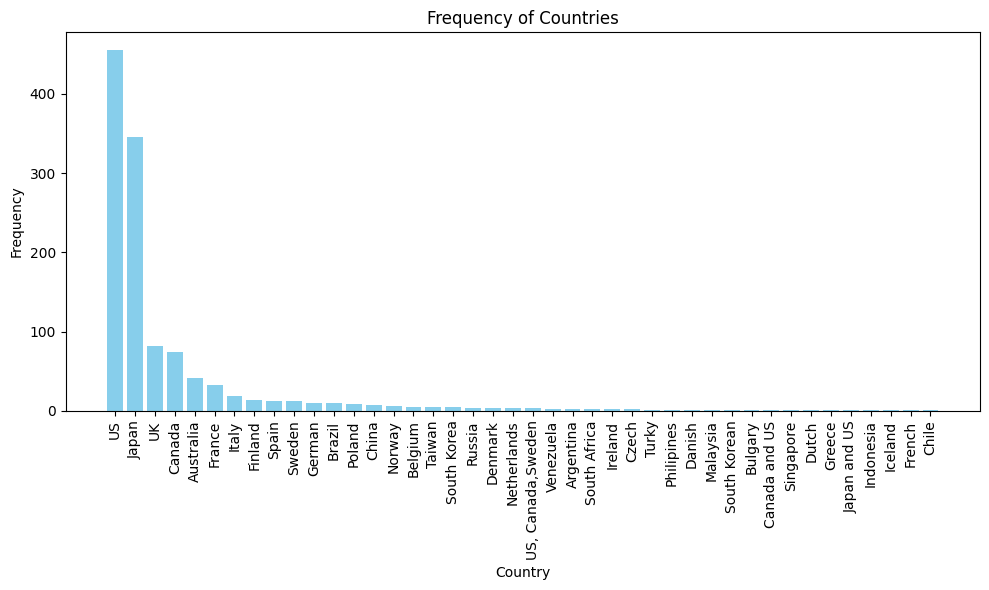

In [12]:
import matplotlib.pyplot as plt

# Plot frequency graph
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Country'], filtered_df['Frequency'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Countries')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Convert country name to ISO Alpha-3 code

In [13]:
import pycountry

def get_iso_alpha3(country_name):
    """
    Convert country name to ISO alpha-3 code.

    Args:
    - country_name: Name of the country

    Returns:
    - ISO alpha-3 code of the country, or None if not found
    """
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Apply the function to the 'Country' column
filtered_df['ISO_alpha3'] = filtered_df['Country'].apply(get_iso_alpha3)

# Display the DataFrame with ISO alpha-3 codes
print(filtered_df)


              Country  Frequency ISO_alpha3
1                  US        455        USA
2               Japan        346        JPN
3                  UK         82       None
4              Canada         74        CAN
5           Australia         41        AUS
6              France         32        FRA
7               Italy         19        ITA
8             Finland         13        FIN
9               Spain         12        ESP
10             Sweden         12        SWE
11             German         10       None
12             Brazil         10        BRA
13             Poland          8        POL
14              China          7        CHN
15             Norway          6        NOR
16            Belgium          5        BEL
17             Taiwan          5        TWN
18        South Korea          5        KOR
20             Russia          4       None
21            Denmark          4        DNK
23        Netherlands          3        NLD
25  US, Canada,Sweden          3

In [14]:
# Manual mapping of country names to ISO alpha-3 codes
manual_mapping = {
    'UK': 'GBR',
    'Russia': 'RUS',
    'Czech': 'CZE',
    'Philipines': 'PHL',
    'Turky': 'TUR',
    'Danish': 'DNK',
    'Bulgary': 'BGR',
    'Dutch': 'NLD'
    # Add more mappings as needed
}

# Replace None values in the 'ISO_alpha3' column with ISO alpha-3 codes from the manual mapping
filtered_df['ISO_alpha3'] = filtered_df.apply(lambda row: manual_mapping.get(row['Country'], row['ISO_alpha3']), axis=1)

# Display the DataFrame with updated ISO alpha-3 codes
print(filtered_df)


              Country  Frequency ISO_alpha3
1                  US        455        USA
2               Japan        346        JPN
3                  UK         82        GBR
4              Canada         74        CAN
5           Australia         41        AUS
6              France         32        FRA
7               Italy         19        ITA
8             Finland         13        FIN
9               Spain         12        ESP
10             Sweden         12        SWE
11             German         10       None
12             Brazil         10        BRA
13             Poland          8        POL
14              China          7        CHN
15             Norway          6        NOR
16            Belgium          5        BEL
17             Taiwan          5        TWN
18        South Korea          5        KOR
20             Russia          4        RUS
21            Denmark          4        DNK
23        Netherlands          3        NLD
25  US, Canada,Sweden          3

In [15]:
# Check for duplicate ISO alpha-3 codes
duplicate_iso_alpha3 = filtered_df[filtered_df.duplicated(subset='ISO_alpha3', keep=False)]
print("Duplicate ISO alpha-3 codes:")
print(duplicate_iso_alpha3)

Duplicate ISO alpha-3 codes:
              Country  Frequency ISO_alpha3
11             German         10       None
21            Denmark          4        DNK
23        Netherlands          3        NLD
25  US, Canada,Sweden          3       None
33             Danish          1        DNK
35       South Korean          1       None
38      Canada and US          1       None
41              Dutch          1        NLD
43       Japan and US          1       None
46             French          1       None


In [16]:
# Group the DataFrame by 'ISO_alpha3' and aggregate 'Country' and 'Frequency'
merged_df = filtered_df.groupby('ISO_alpha3').agg({'Country': ', '.join, 'Frequency': 'sum'}).reset_index()

# Display the merged DataFrame
print(merged_df)


   ISO_alpha3             Country  Frequency
0         ARG           Argentina          2
1         AUS           Australia         41
2         BEL             Belgium          5
3         BGR             Bulgary          1
4         BRA              Brazil         10
5         CAN              Canada         74
6         CHL               Chile          1
7         CHN               China          7
8         CZE               Czech          2
9         DNK     Denmark, Danish          5
10        ESP               Spain         12
11        FIN             Finland         13
12        FRA              France         32
13        GBR                  UK         82
14        GRC              Greece          1
15        IDN           Indonesia          1
16        IRL             Ireland          2
17        ISL             Iceland          1
18        ITA               Italy         19
19        JPN               Japan        346
20        KOR         South Korea          5
21        

# Data Visualization

In [17]:

import plotly.express as px

# Define custom color scale starting with light blue and transitioning to dark blue
custom_colors = [(0, 'rgb(50,100,255)'), (0.1, 'rgb(30,70,200)'), (0.2, 'rgb(10,40,150)'),
                 (0.4, 'rgb(0,0,100)'), (0.6, 'rgb(0,0,80)'), (0.8, 'rgb(0,0,60)'), (1, 'rgb(0,0,40)')]

# Filter the DataFrame to exclude countries with frequency 0 or not in the database
filtered_df = merged_df[(merged_df['Frequency'] > 0) & (merged_df['Country'].notnull())]

# Create the heatmap with custom color scale
fig = px.choropleth(
    filtered_df,
    locations='ISO_alpha3',
    color='Frequency',
    hover_name='Country',
    projection='natural earth',
    color_continuous_scale=custom_colors,  # Use custom color scale
    title='World Heatmap of Country Frequency'
)

# Show the plot
fig.show()


In [18]:
import plotly.express as px
# Define custom color scale starting with light blue and transitioning to dark blue
custom_colors = [(0, 'rgb(50,100,255)'), (0.1, 'rgb(30,70,200)'), (0.2, 'rgb(10,40,150)'),
                 (0.4, 'rgb(0,0,100)'), (0.6, 'rgb(0,0,80)'), (0.8, 'rgb(0,0,60)'), (1, 'rgb(0,0,40)')]

# Filter the DataFrame to exclude Japan and US
filtered_df = merged_df[~merged_df['Country'].isin(['Japan', 'US'])]

# Create the heatmap with the custom color scale
fig = px.choropleth(
    filtered_df,
    locations='ISO_alpha3',
    color='Frequency',
    hover_name='Country',
    projection='natural earth',
    title='World Heatmap of Country Frequency (Excluding Japan and US)',
    color_continuous_scale=custom_colors,  # Use custom color scale
    color_continuous_midpoint=filtered_df['Frequency'].median(),  # Set the midpoint for the color scale
    range_color=(filtered_df['Frequency'].min(), filtered_df['Frequency'].max()),  # Set the range for the color scale
    labels={'Frequency': 'Frequency'}
)

# Show the plot
fig.show()


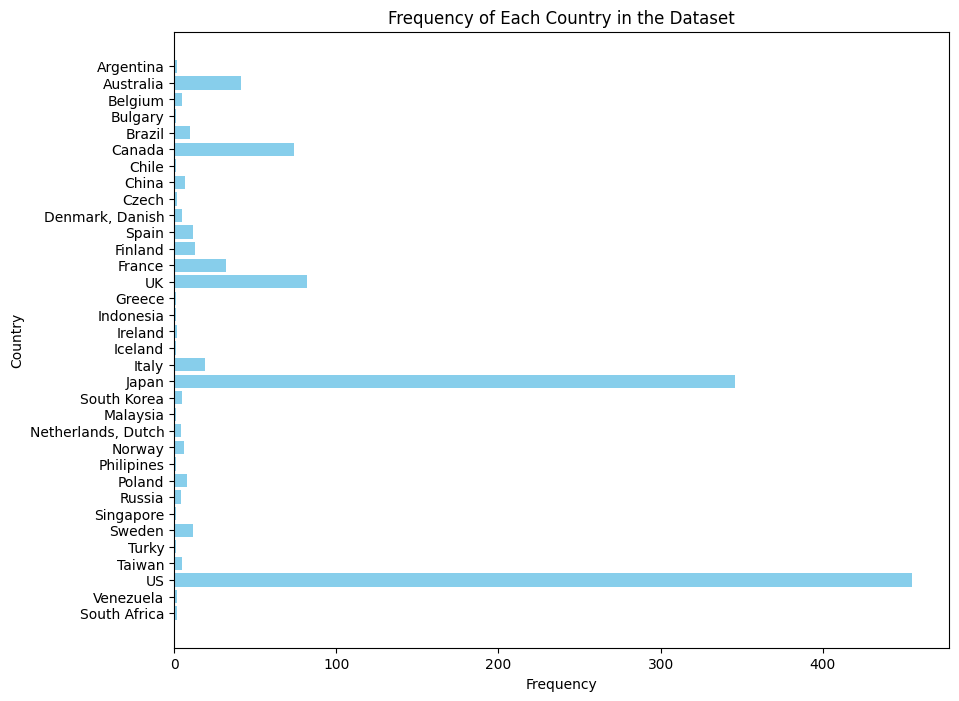

In [19]:
import matplotlib.pyplot as plt

# Extract country names and frequencies from the data dictionary
countries = merged_df['Country']
frequencies = merged_df['Frequency']

# Ensure both arrays have the same length
min_length = min(len(countries), len(frequencies))
countries = countries[:min_length]
frequencies = frequencies[:min_length]

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(countries, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Frequency of Each Country in the Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()


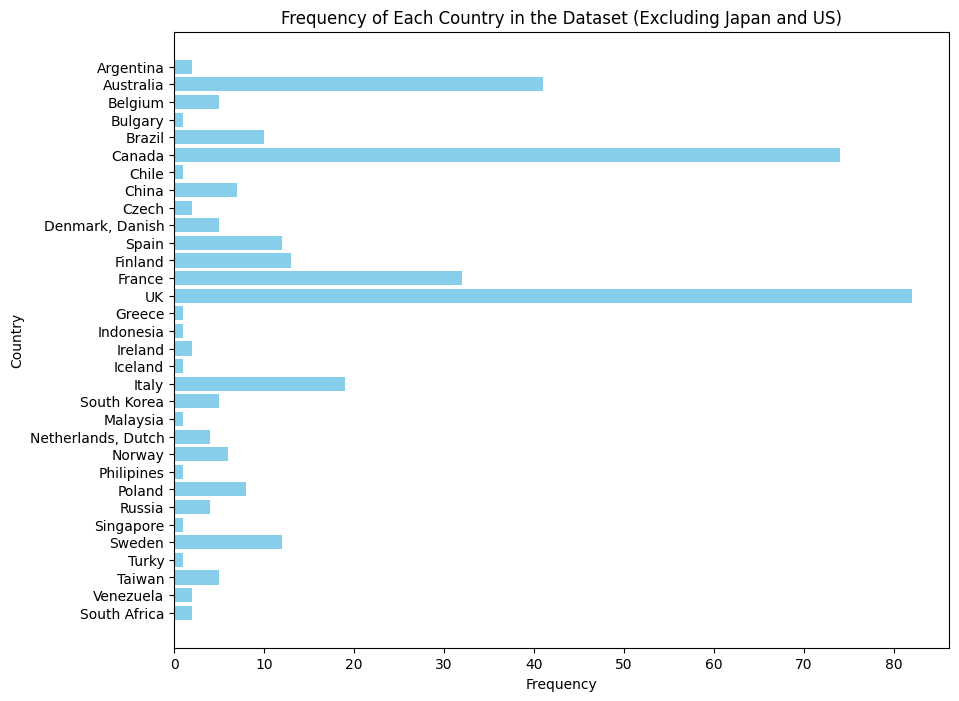

In [20]:
import matplotlib.pyplot as plt

# Filter out Japan and US from the data
filtered_countries = [country for country, freq in zip(countries, frequencies) if country not in ['Japan', 'US']]
filtered_frequencies = [freq for country, freq in zip(countries, frequencies) if country not in ['Japan', 'US']]

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(filtered_countries, filtered_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Frequency of Each Country in the Dataset (Excluding Japan and US)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()


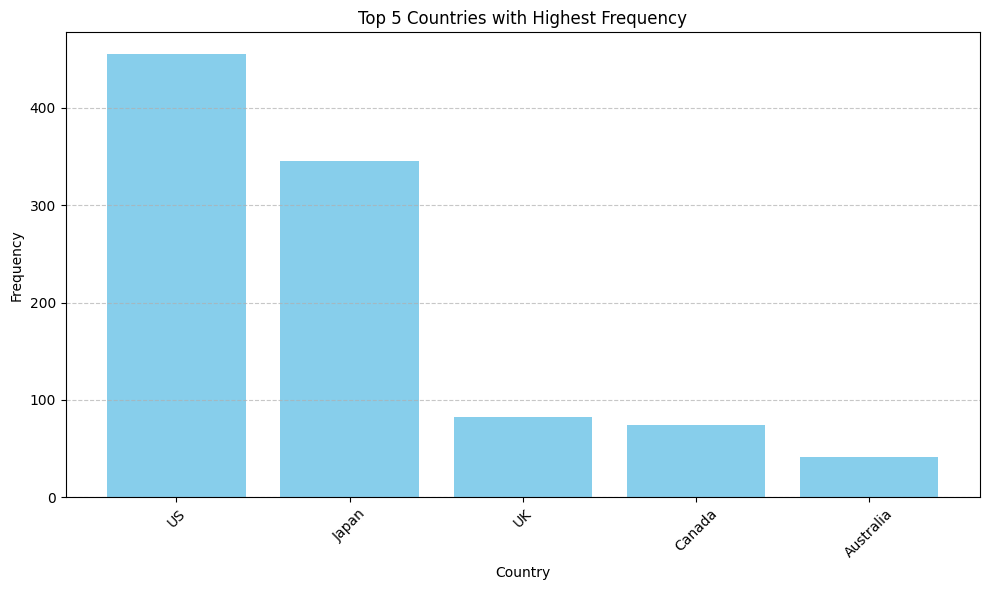

In [21]:
# Filter out "Unknown" values from the 'Country' column
filtered_df = df[df['Country'] != 'Unknown']

# Count occurrences of each country
country_counts = filtered_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Get the top 5 countries with the highest frequency
top_5_countries = country_counts.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['Country'], top_5_countries['Count'], color='skyblue')
plt.title('Top 5 Countries with Highest Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

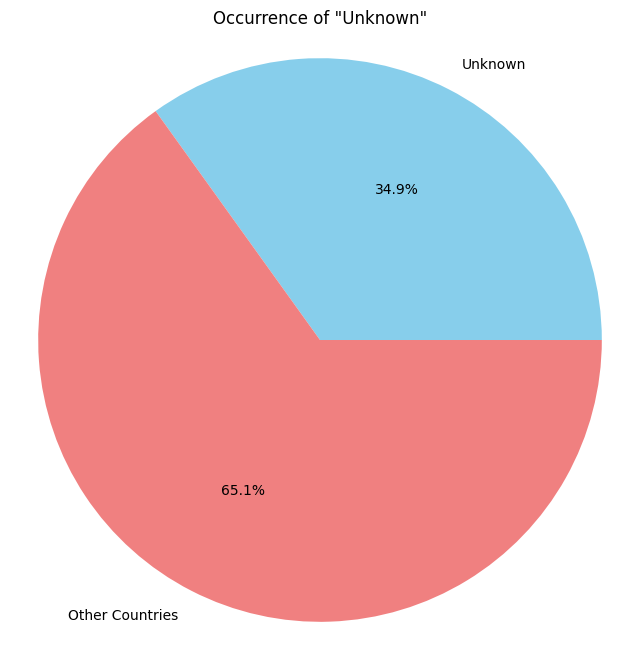

In [22]:
# Count occurrences of 'Unknown'
unknown_count = df[df['Country'] == 'Unknown'].shape[0]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie([unknown_count, len(df) - unknown_count], labels=['Unknown', 'Other Countries'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Occurrence of "Unknown"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [23]:
# Filter data where "Lesbian" is mentioned in protagonist representation
lesbian_df = df[df['Protagonist rep.'].str.contains('Lesbian', na=False)]
lesbian_df.head()

,#,Title,Year,Developer,Publisher,Genre,Platform,Protagonist rep.,NPC/s rep.,Country
13,14.0,Abducted,2019,Mystery Zone Games,Mystery Zone Games,Visual novel,PC,Gay Lesbian,Bisexual / plurisexual Gay,US
15,16.0,Abigail,2010,Nevosoft,GameHouse Inc.,Simulation,PC (free),Lesbian,Lesbian,Canada
16,17.0,A Cat With No Tail,2016,cham,cham,Visual novel,PC,Lesbian,Lesbian,Canada
28,28.0,Ace of Hearts,2019,TheLastYuriSamurai,TheLastYuriSamurai,RPG,PC (free or donation),Asexual / aromantic Lesbian,Lesbian,Unknown
41,41.0,After the Bell Rings,2015,Andrea律,Andrea律,Visual novel,PC,Lesbian,Lesbian,Unknown


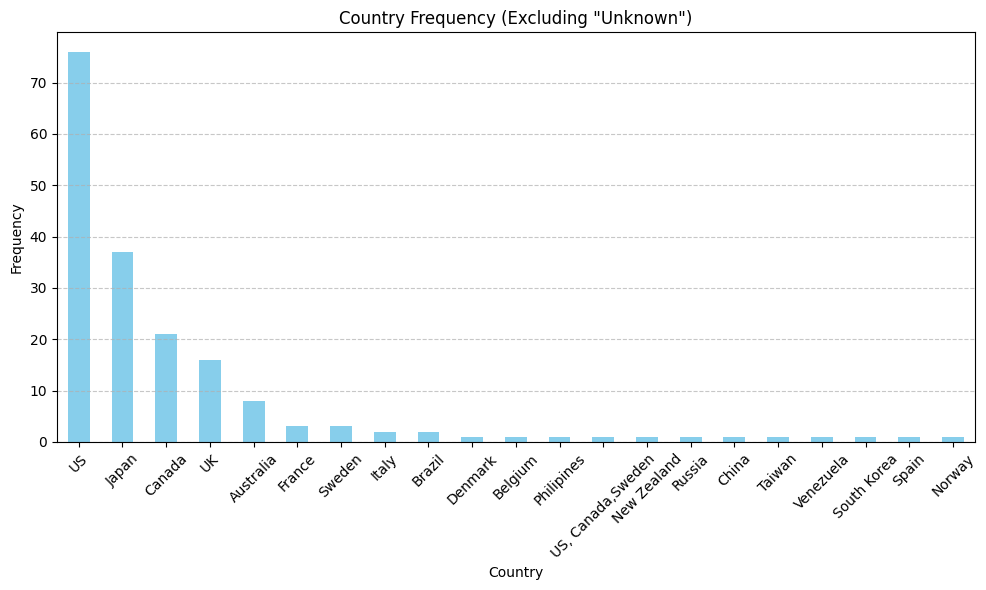

In [24]:
filtered_lesbian_df = lesbian_df[lesbian_df['Country'] != 'Unknown']

# Count frequency of each country
country_counts = filtered_lesbian_df['Country'].value_counts()

# Plot country frequency
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Country Frequency (Excluding "Unknown")')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

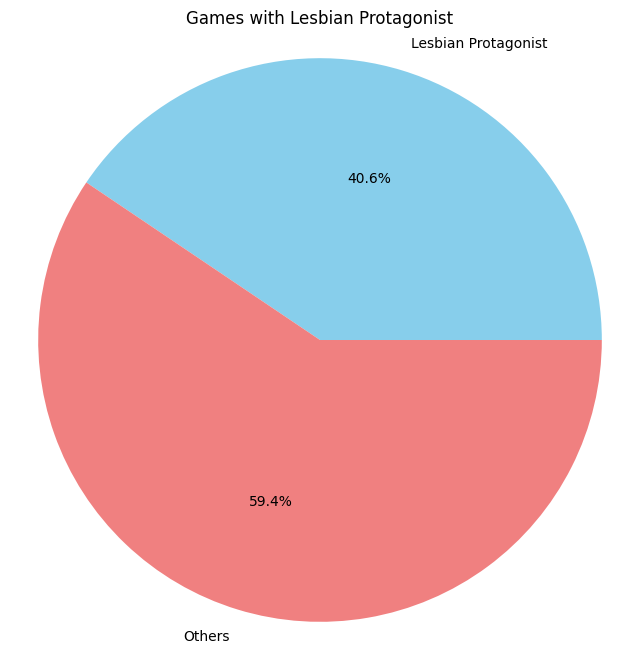

In [25]:
# Drop rows with missing values in 'Protagonist rep.' column
df.dropna(subset=['Protagonist rep.'], inplace=True)

# Filter dataset to include only entries with 'Lesbian' in protagonist rep.
lesbian_df = df[df['Protagonist rep.'].str.contains('Lesbian')]

# Count the number of games
num_games = len(lesbian_df)

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie([num_games, len(df) - num_games], labels=['Lesbian Protagonist', 'Others'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Games with Lesbian Protagonist')
plt.axis('equal')
plt.show()

In [26]:
import seaborn as sns

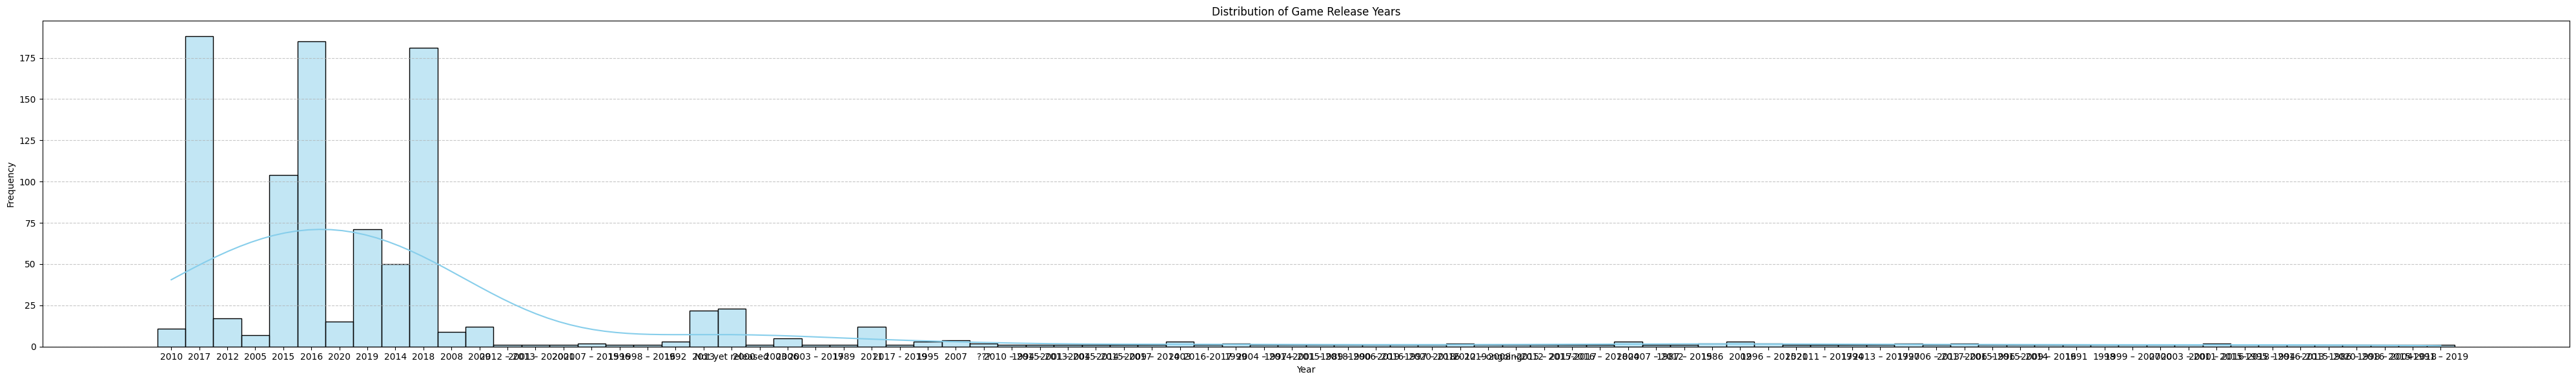

In [27]:
# Visualization 1: Distribution of Years
plt.figure(figsize=(40, 6))
sns.histplot(df['Year'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Game Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


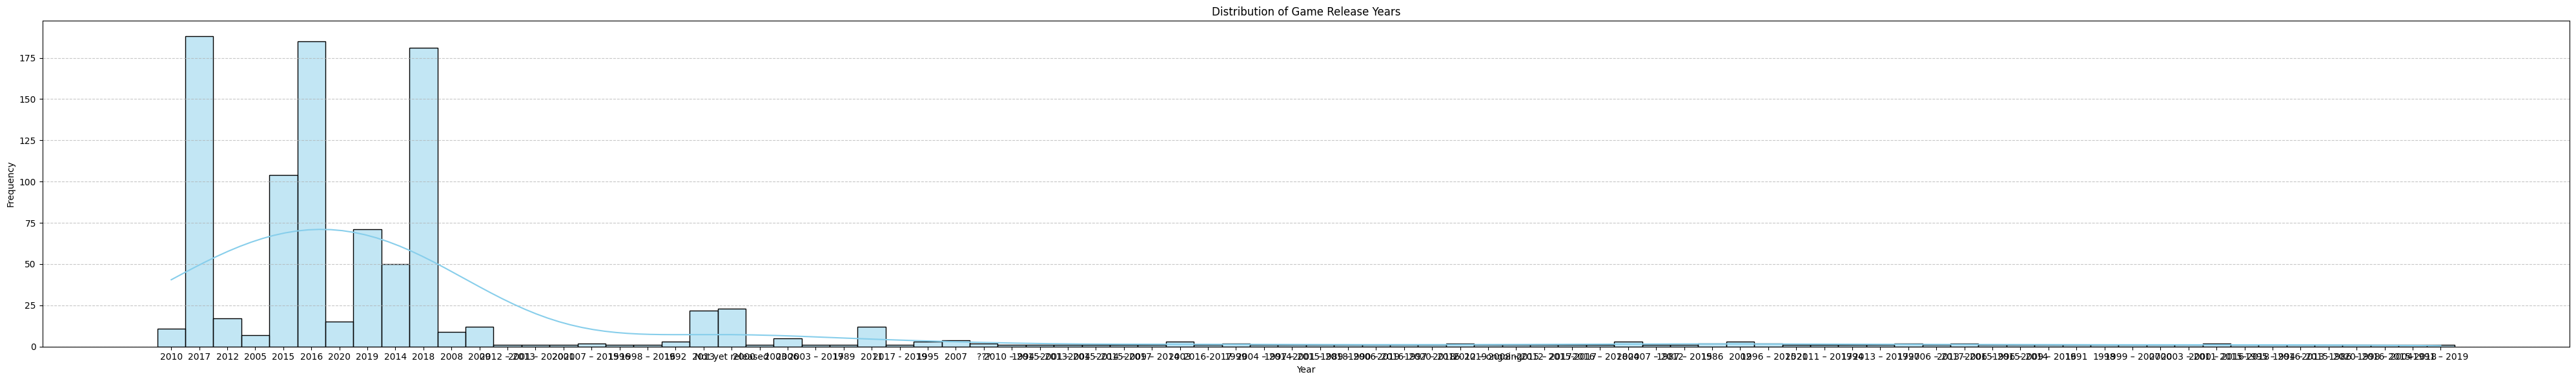

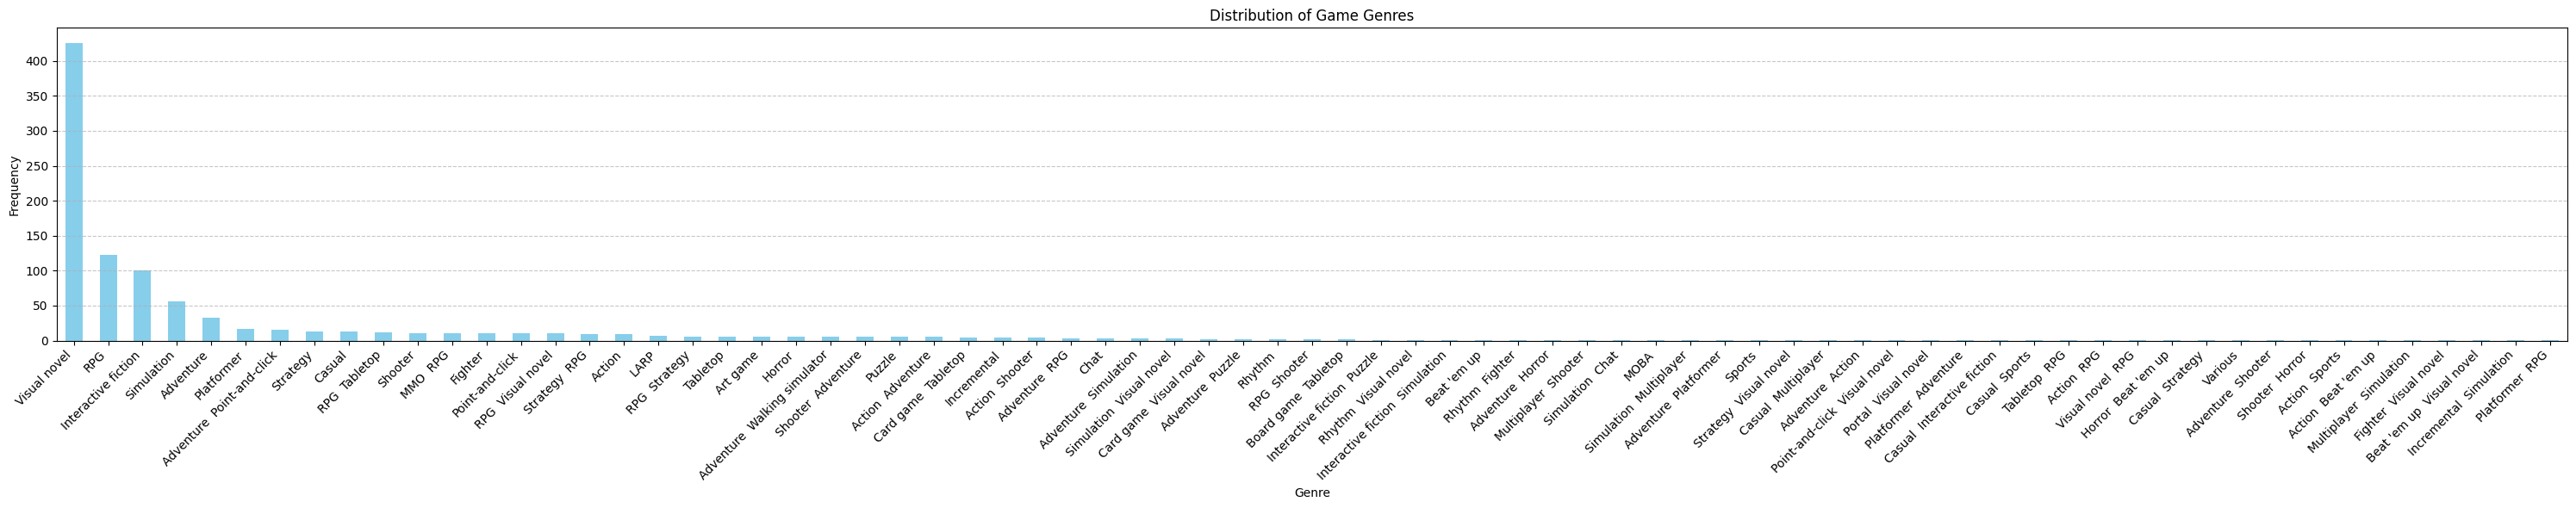

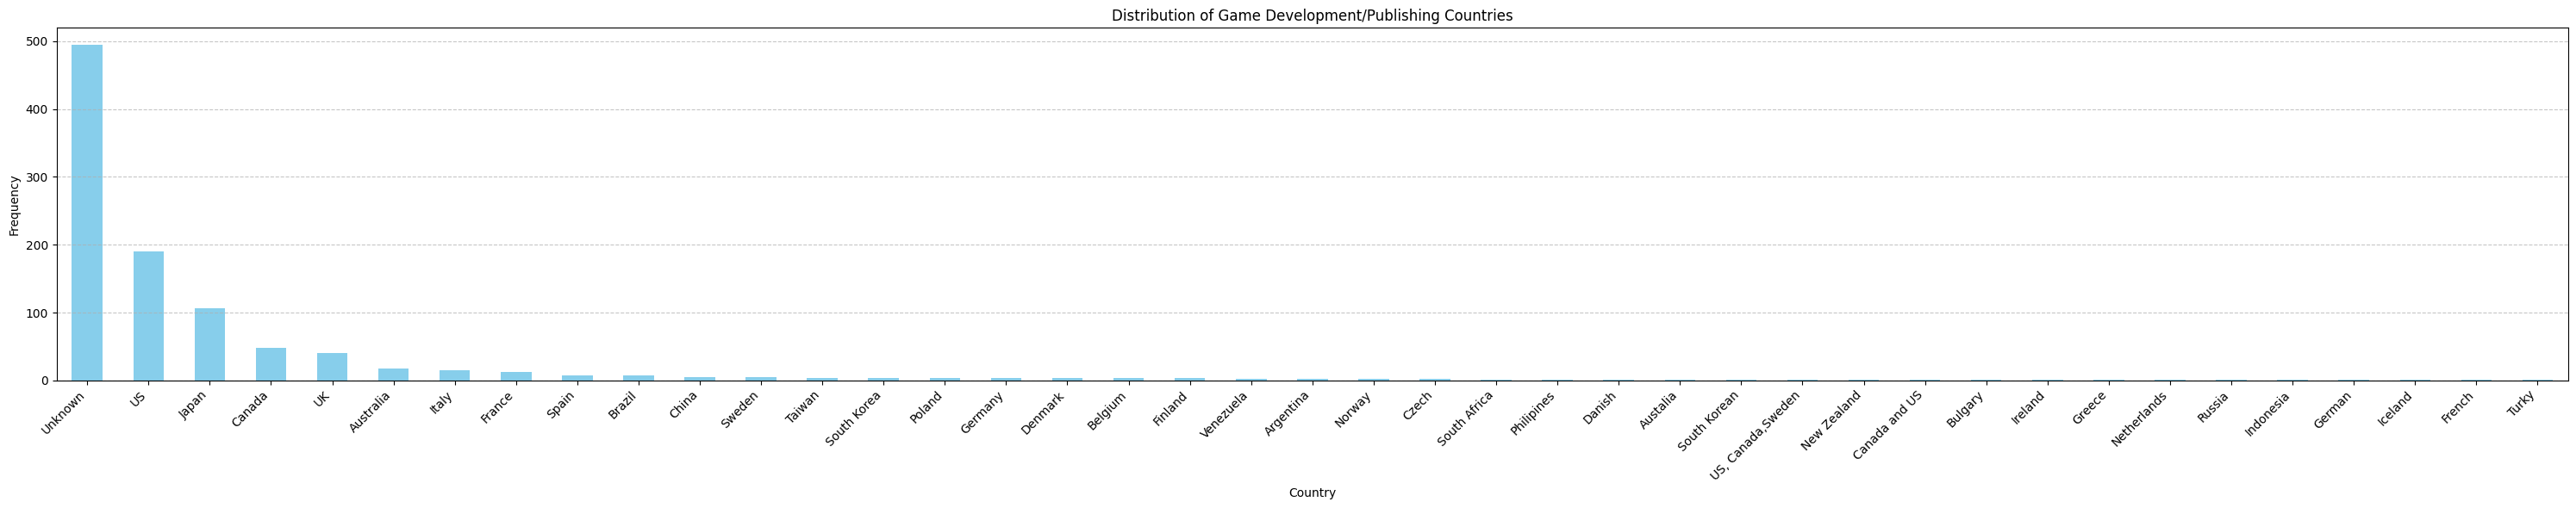

<ipython-input-28-481b7ea190fc>:41: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



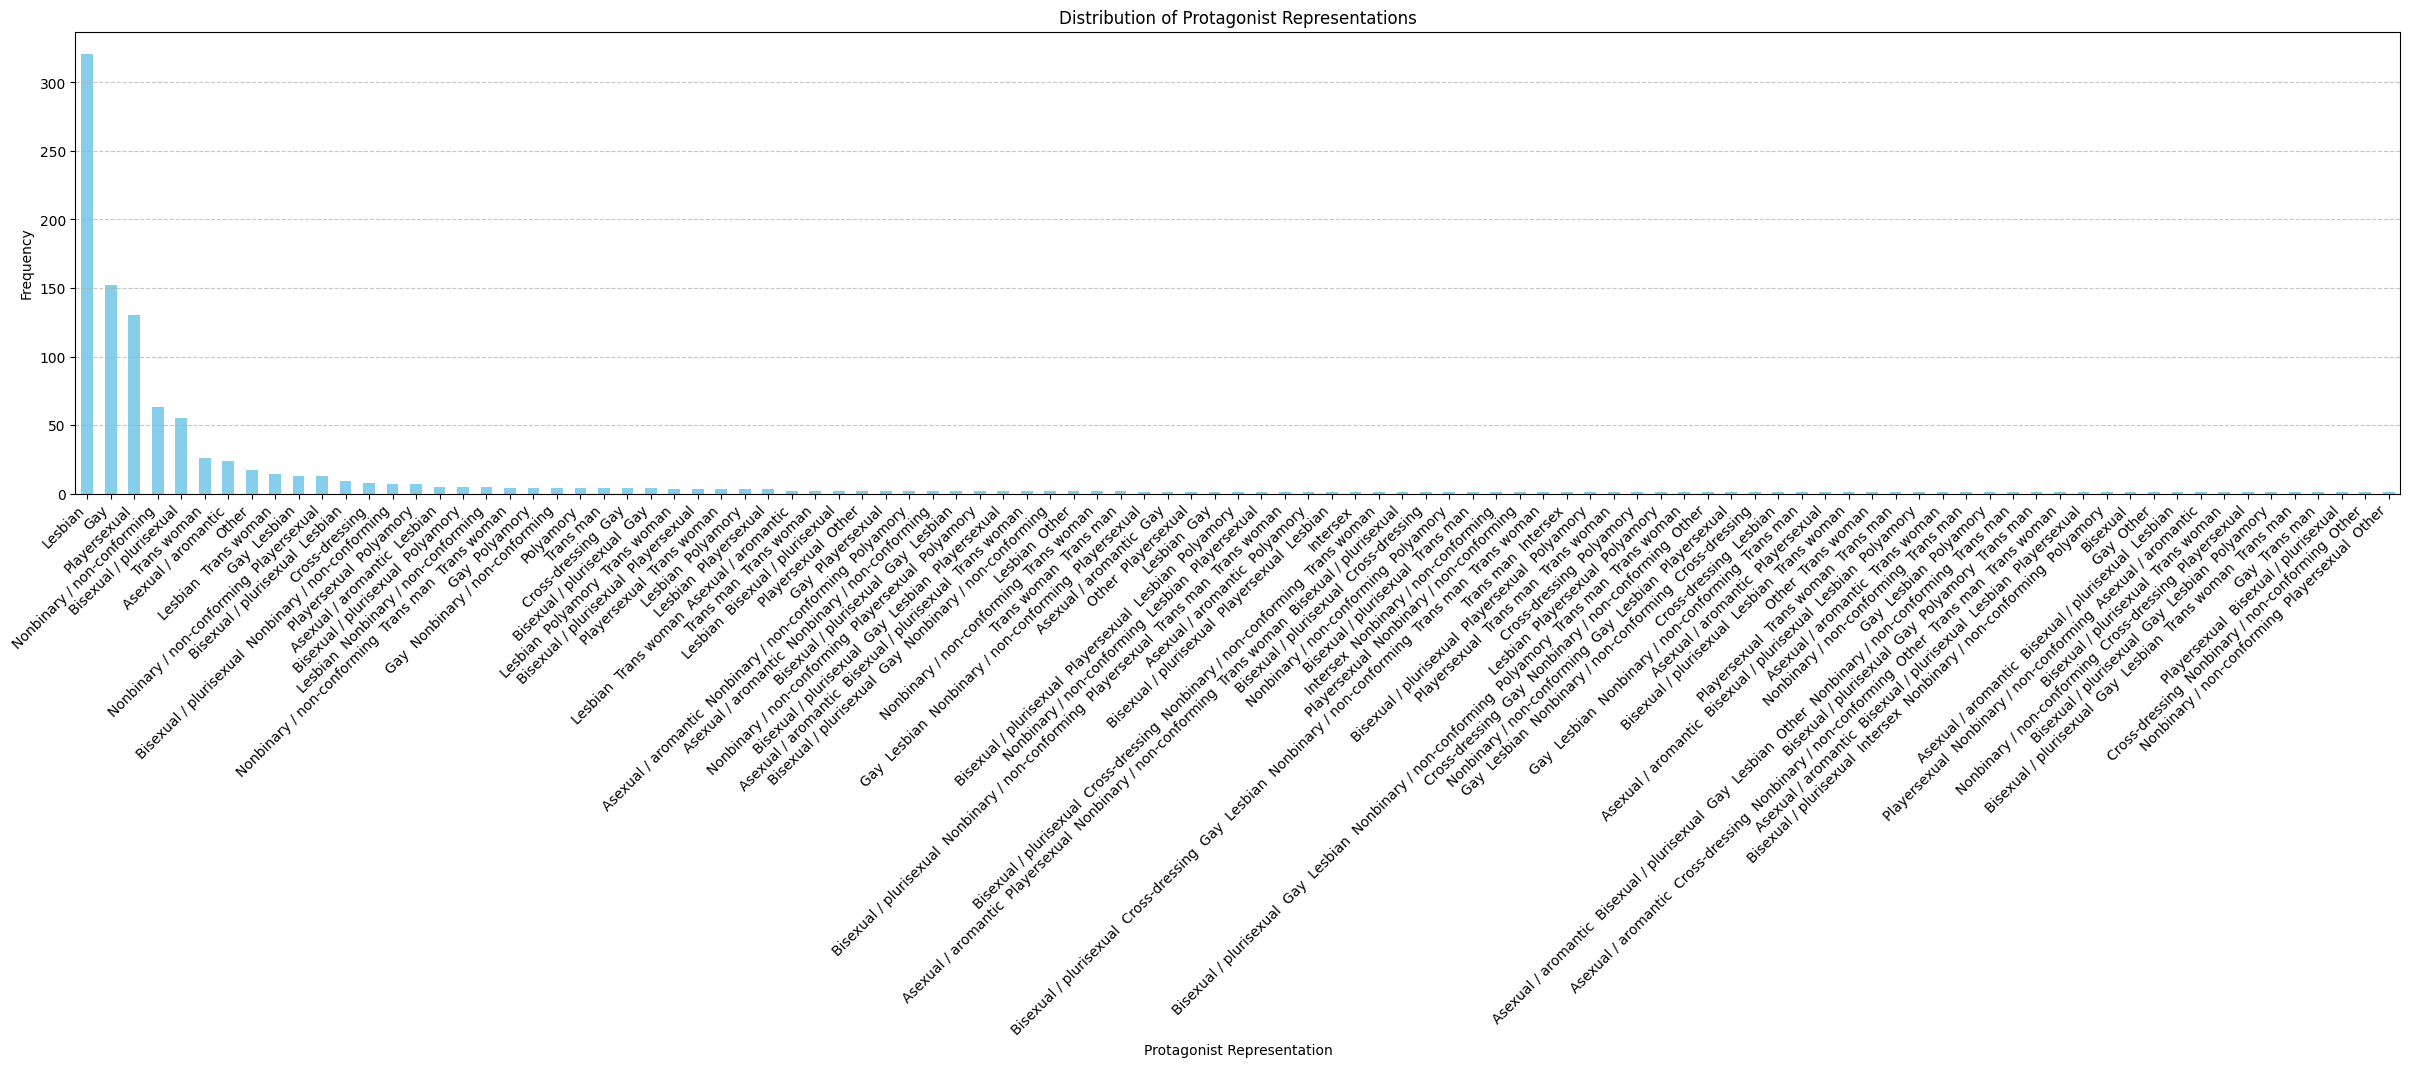

<ipython-input-28-481b7ea190fc>:53: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



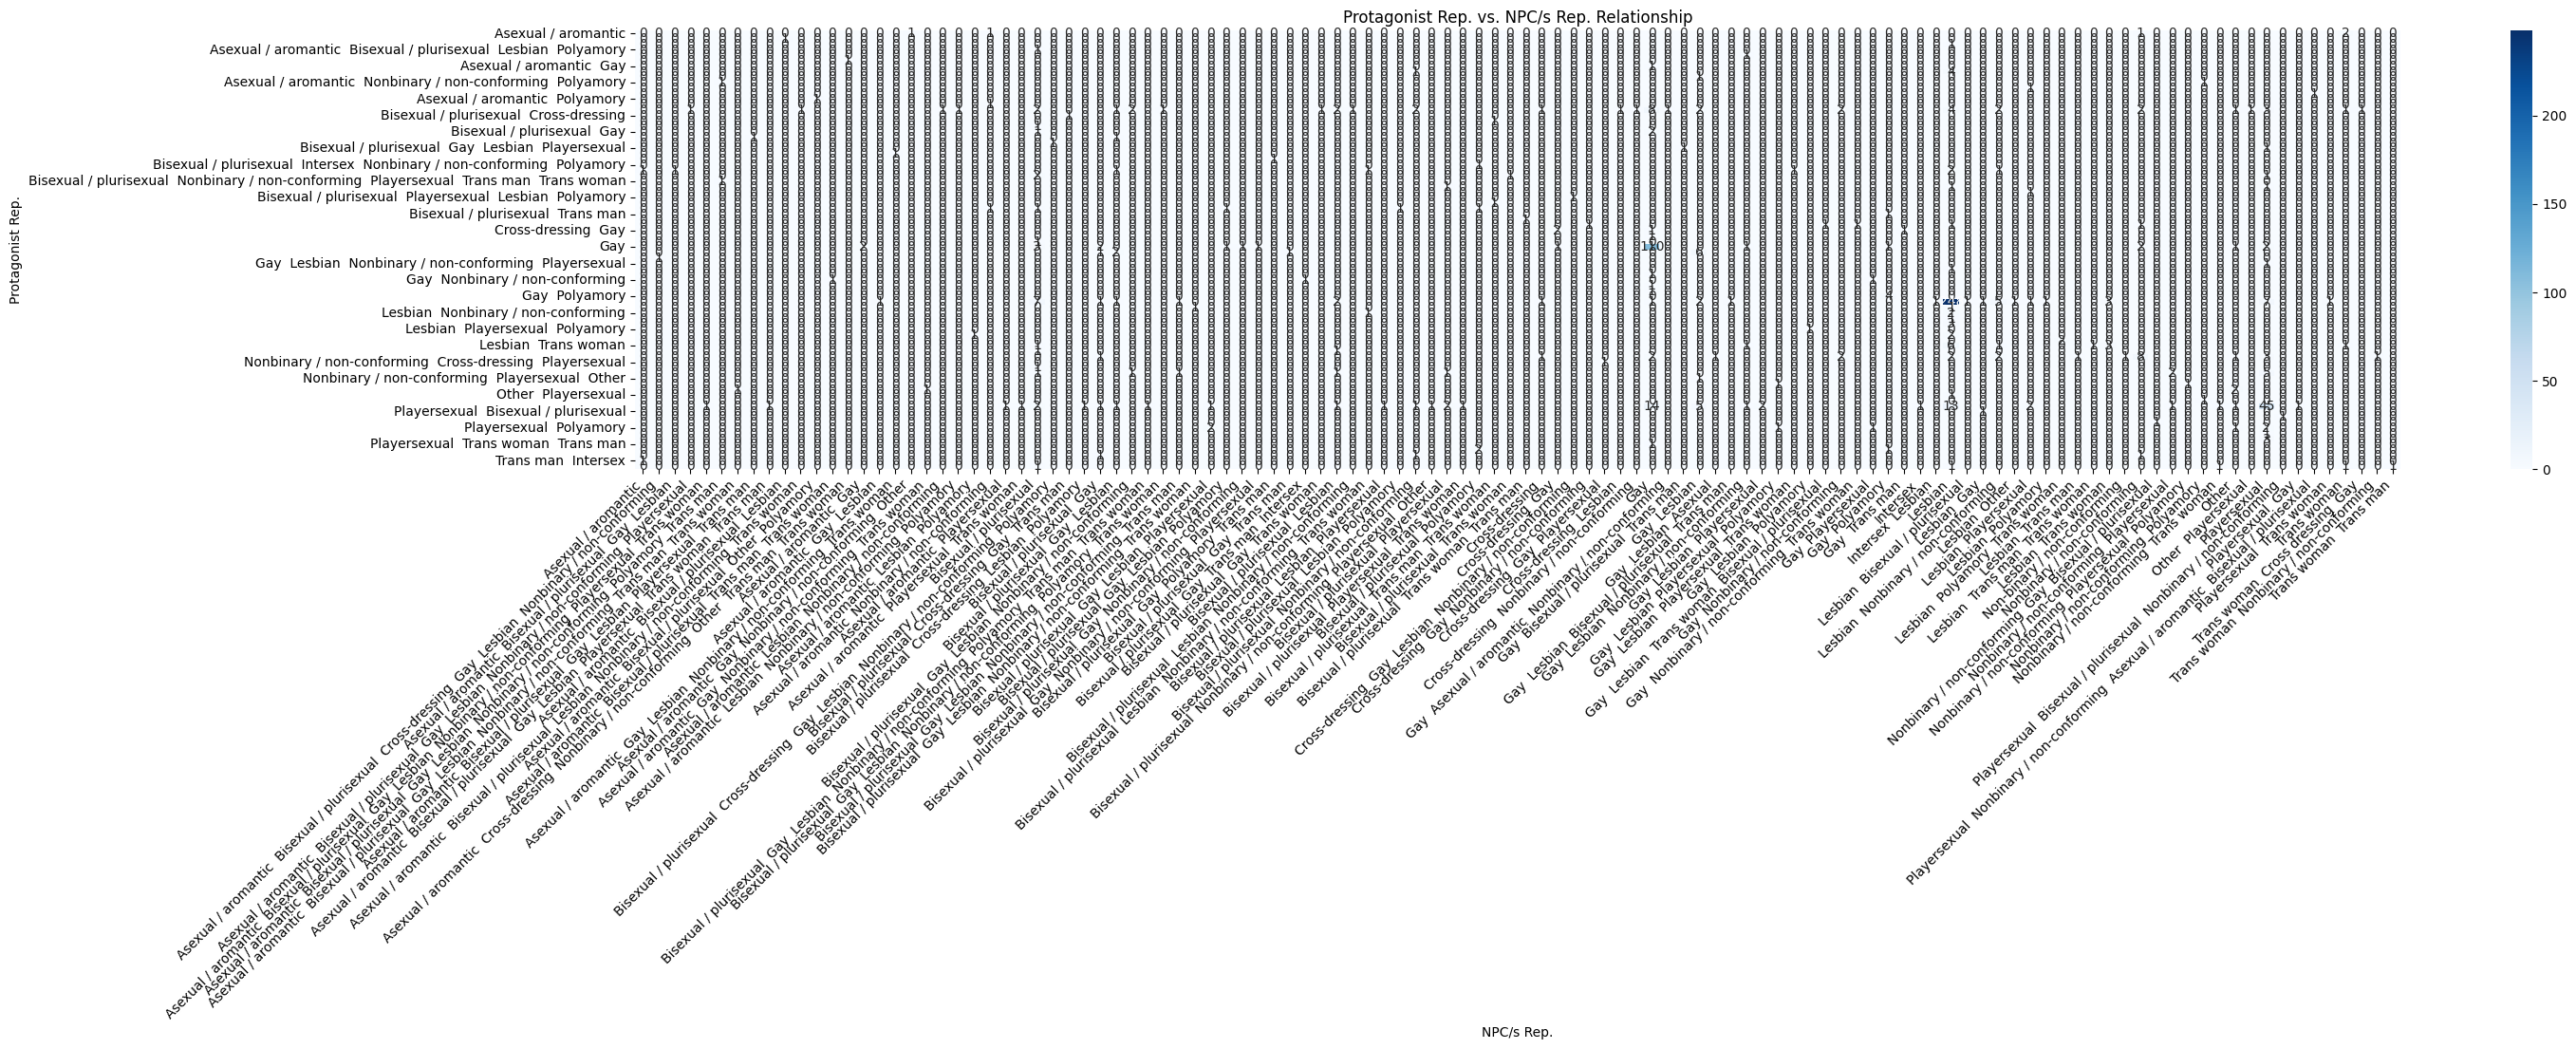

In [28]:
# Visualization 1: Distribution of Years
plt.figure(figsize=(40, 6))
sns.histplot(df['Year'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Game Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Distribution of Genres
plt.figure(figsize=(30, 6))
df['Genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Game Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 3: Distribution of Countries
plt.figure(figsize=(30, 6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Game Development/Publishing Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 4: Distribution of Protagonist Representations
plt.figure(figsize=(30, 6))
df['Protagonist rep.'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Protagonist Representations')
plt.xlabel('Protagonist Representation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 5: Heatmap of Protagonist Rep. vs. NPC/s Rep.
plt.figure(figsize=(30, 6))
heatmap_data = pd.crosstab(df['Protagonist rep.'], df['NPC/s rep.'])
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Protagonist Rep. vs. NPC/s Rep. Relationship')
plt.xlabel('NPC/s Rep.')
plt.ylabel('Protagonist Rep.')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Filter dataset to include only games with 'Lesbian' protagonist representation
lesbian_games_df = df[df['Protagonist rep.'].str.contains('Lesbian')]

# Count occurrences of each country
country_counts = lesbian_games_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Plot heatmap on a world map with a custom color scale
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Count',
    hover_name='Country',
    projection='natural earth',
    title='Distribution of Games with Lesbian Protagonist',
    range_color=(1, 80),  # Set range of the heatmap
    color_continuous_scale=[
        (0.0, '#FFFFCC'),
        (0.01, '#FFFF99'),
        (0.03, '#FFFF66'),
        (0.05, '#FFFF33'),
        (0.07, '#FFFF00'),
        (0.09, '#FFCC00'),
        (0.1, '#FF9900'),
        (0.2, '#FEE8C8'),
        (0.4, '#FDD49E'),
        (0.6, '#FDBB84'),
        (0.8, '#FC8D59'),
        (1.0, '#E41A1C')  # Adjust the final color to red for higher values
    ]
)

# Show the plot
fig.show()